# Preprocessing of the data

# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset of Renren Dai.csv',sep=',',header=0)

In [2]:
df=df.dropna(subset=['status'])

status is the dependent variable showing whether the p2p contract is success or not
status = 0, means failure
status = 1, means success
statut = NULL, means the p2p contract is still applying and the result is ambiguous so we drop these samples.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['interest', 'maturity', 'target', 'age','pastsuccess','pastdefault', 'status']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
code,7495.0,4309.225217,2818.603191,1.0,1874.50,3810.00,6645.50,9756.00
target,7495.0,64464.322882,81814.482057,3000.0,20000.00,46700.00,80000.00,500000.00
interest,7495.0,0.140053,0.026086,0.1,0.12,0.13,0.15,0.24
maturity,7495.0,18.654570,10.485777,3.0,12.00,18.00,24.00,36.00
payment,7495.0,5012.022148,10237.547471,145.0,1408.50,2420.00,4642.00,171700.00
status,7495.0,0.645230,0.478475,0.0,0.00,1.00,1.00,1.00
id,7495.0,679082.258172,175504.380883,2283.0,718306.50,752691.00,762427.00,776595.00
age,7495.0,32.073382,7.930843,20.0,26.00,30.00,37.00,59.00
estate,7495.0,0.448432,0.497367,0.0,0.00,0.00,1.00,1.00
houseloan,7495.0,0.217879,0.412832,0.0,0.00,0.00,0.00,1.00


note that some of the variable values are in Chinese and I translate most of them

In [5]:
X = df.iloc[:, [0,1,2,3,8,13,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]]
y = df.iloc[:, 5]
X.tail

<bound method NDFrame.tail of       code  target  interest  maturity  age  estate  application  pastsuccess  \
0        1    3000      0.10         3   29       0            2            1   
1        2    6000      0.11         6   30       1            1            1   
2        3   50000      0.15        24   27       0            1            0   
3        4   10000      0.20        24   23       0            4            0   
4        5    5000      0.20         9   26       0            1            0   
5        6   50000      0.13         6   26       0            1            0   
6        7  100000      0.15        24   28       0            2            0   
7        8   15000      0.10         3   23       0            1            0   
8        9   20000      0.15        12   32       0           10            0   
9       10  100000      0.15        12   41       1            1            0   
10      11    6000      0.11         6   36       1            4            0  

In [6]:
df1= pd.get_dummies(df[['income','education','marriage','code','workingtime']],drop_first=True)

X1=pd.merge(X,df1,on='code')


In [7]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
code,7495.0,4309.225217,2818.603191,1.0,1874.5,3810.0,6645.5,9756.0
income_10000-20000,7495.0,0.141694,0.348760,0.0,0.0,0.0,0.0,1.0
income_1001-2000,7495.0,0.006938,0.083010,0.0,0.0,0.0,0.0,1.0
income_2000-5000,7495.0,0.300867,0.458666,0.0,0.0,0.0,1.0,1.0
income_20000-50000,7495.0,0.089393,0.285329,0.0,0.0,0.0,0.0,1.0
income_5000-10000,7495.0,0.330620,0.470468,0.0,0.0,0.0,1.0,1.0
"income_5000-10000 ,",7495.0,0.000267,0.016334,0.0,0.0,0.0,0.0,1.0
income_above 50000,7495.0,0.051234,0.220490,0.0,0.0,0.0,0.0,1.0
income_below 1000,7495.0,0.004136,0.064184,0.0,0.0,0.0,0.0,1.0
education_highschool,7495.0,0.327018,0.469155,0.0,0.0,0.0,1.0,1.0


Here X is the original dataset we used and df1 is the dummy variable we derived, we use code to connect them

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.3, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y.astype(np.int32)))
print('Labels counts in y_train:', np.bincount(y_train.astype(np.int32)))
print('Labels counts in y_test:', np.bincount(y_test.astype(np.int32)))

Labels counts in y: [2659 4836]
Labels counts in y_train: [1861 3385]
Labels counts in y_test: [ 798 1451]


# Basic methods of classifying

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_std)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 46
Accuracy: 0.98


In [11]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y0_pred = ppn.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Misclassified samples: %d' % (y_test != y0_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y0_pred))

Misclassified samples: 62
Accuracy: 0.97


In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
y1_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y1_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y1_pred))

Misclassified samples: 46
Accuracy: 0.98


In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
y2_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y2_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y2_pred))


Misclassified samples: 104
Accuracy: 0.95


In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)
y3_pred = tree.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y3_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y3_pred))

Misclassified samples: 75
Accuracy: 0.97


In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
y4_pred = forest.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y4_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y4_pred))

Misclassified samples: 68
Accuracy: 0.97


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)
y5_pred = knn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y5_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y5_pred))

Misclassified samples: 86
Accuracy: 0.96


Among all explaining variables, there are three core explaining variables directly related with monthly payment. 
Later we will see how themselves explain this model.

In [17]:
X2 = df.iloc[:, [1,2,3]]
y = df.iloc[:, 5]

In [18]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.3, random_state=1, stratify=y)


In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X2_train)
X2_train_std = sc.transform(X2_train)
X2_test_std = sc.transform(X2_test)
print('Labels counts in y:', np.bincount(y.astype(np.int32)))
print('Labels counts in y_train:', np.bincount(y_train.astype(np.int32)))
print('Labels counts in y_test:', np.bincount(y_test.astype(np.int32)))

Labels counts in y: [2659 4836]
Labels counts in y_train: [1861 3385]
Labels counts in y_test: [ 798 1451]


I change the variable type of y to make it works. To be more accurate,that should be ynew=...

In [20]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X2_train_std, y2_train)
y21_pred = ppn.predict(X2_test_std)
from sklearn.metrics import accuracy_score
print('Misclassified samples: %d' % (y2_test != y2_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y2_test, y2_pred))

Misclassified samples: 104
Accuracy: 0.95


In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X2_train_std, y2_train)

from sklearn.metrics import accuracy_score
y22_pred = lr.predict(X2_test_std)

print('Misclassified samples: %d' % (y2_test != y22_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y2_test, y22_pred))

Misclassified samples: 100
Accuracy: 0.96


In [22]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X2_train_std, y2_train)
y23_pred = svm.predict(X2_test_std)
print('Misclassified samples: %d' % (y2_test != y23_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y2_test, y23_pred))

Misclassified samples: 91
Accuracy: 0.96


In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X2_train_std, y2_train)
y24_pred = svm.predict(X2_test_std)
print('Misclassified samples: %d' % (y2_test != y24_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y2_test, y24_pred))

Misclassified samples: 90
Accuracy: 0.96


In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X2_train, y2_train)
y25_pred = tree.predict(X2_test)
print('Misclassified samples: %d' % (y2_test != y25_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y2_test, y25_pred))

Misclassified samples: 95
Accuracy: 0.96


In [25]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=50, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X2_train, y2_train)
y26_pred = forest.predict(X2_test)
print('Misclassified samples: %d' % (y2_test != y26_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y2_test, y26_pred))

Misclassified samples: 101
Accuracy: 0.96


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X2_train_std, y2_train)
y27_pred = knn.predict(X2_test_std)
print('Misclassified samples: %d' % (y2_test != y27_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y2_test, y27_pred))

Misclassified samples: 93
Accuracy: 0.96


# PCA method

Using PCA method to reduce dimensions

In [27]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[5.52199982 2.29327396 2.18266813 0.03094458 0.02101557 0.00988585
 0.01298909 0.13463524 0.17697818 0.20354224 1.61930767 0.34575199
 0.42751013 1.48273452 1.45739045 1.4027744  0.50072109 0.58635408
 0.64679879 0.67624117 1.26531135 0.75068643 1.19373079 1.17697714
 1.16050383 0.83969145 1.10679197 0.88117803 0.90606133 0.9264189
 1.0597046  0.96643081 1.02888901 1.02026015 0.99089779 0.99981315
 0.         0.         0.         0.         0.        ]


In [28]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [29]:
cum_var_exp

array([0.15335964, 0.21704956, 0.27766767, 0.32263986, 0.36381908,
       0.40429443, 0.44325296, 0.4783938 , 0.51154667, 0.54423424,
       0.57646432, 0.60720268, 0.6366333 , 0.66520811, 0.69354326,
       0.72131056, 0.74883025, 0.77567043, 0.80139939, 0.82656296,
       0.85103546, 0.87435578, 0.8952042 , 0.9139851 , 0.93194831,
       0.94823282, 0.96213908, 0.9740121 , 0.98361449, 0.98926737,
       0.99418249, 0.99792164, 0.99878105, 0.99936471, 0.99972545,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

Text(0.5,0,'Principal component index')

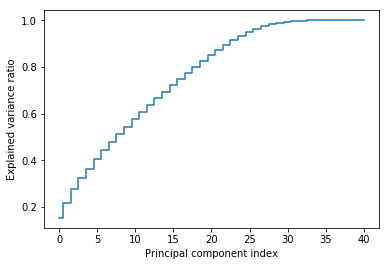

In [30]:
import matplotlib.pyplot as plt


plt.step(range(0,41), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

The result of PCA index is not so good as even 20th PCA component has some explaining power.
But luckily our model itself has high explaining power, we try to combine PCA method with Logisitic regression to compare the accuracy of PCA component variables and our core explaining variables

In [31]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([1.53359645e-01, 6.36899115e-02, 6.06181128e-02, 4.49721944e-02,
       4.11792188e-02, 4.04753512e-02, 3.89585279e-02, 3.51408376e-02,
       3.31528678e-02, 3.26875773e-02, 3.22300725e-02, 3.07383608e-02,
       2.94306276e-02, 2.85748024e-02, 2.83351575e-02, 2.77672934e-02,
       2.75196918e-02, 2.68401830e-02, 2.57289529e-02, 2.51635727e-02,
       2.44725015e-02, 2.33203164e-02, 2.08484260e-02, 1.87808962e-02,
       1.79632083e-02, 1.62845086e-02, 1.39062678e-02, 1.18730177e-02,
       9.60239104e-03, 5.65287340e-03, 4.91512356e-03, 3.73915479e-03,
       8.59407704e-04, 5.83654598e-04, 3.60739300e-04, 2.74554554e-04,
       1.28052055e-33, 1.28052055e-33, 1.28052055e-33, 1.28052055e-33,
       1.28052055e-33])

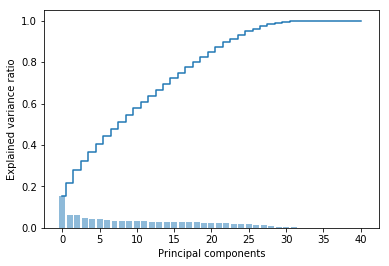

In [32]:
plt.bar(range(0,41), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0,41), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

Here we pick 5 components using PCA method

In [33]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.15335963, 0.06368005, 0.06060264, 0.04436394, 0.04095124])

In [34]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_pca, y_train)

from sklearn.metrics import accuracy_score
ypca_pred = lr.predict(X_test_pca)

print('Misclassified samples: %d' % (y_test != ypca_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, ypca_pred))

Misclassified samples: 86
Accuracy: 0.96


In [35]:
pca = PCA(n_components=3)
X_train_pca1 = pca.fit_transform(X_train_std)
X_test_pca1 = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.15335964, 0.06368989, 0.06061657])

In [36]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_pca1, y_train)

from sklearn.metrics import accuracy_score
ypca1_pred = lr.predict(X_test_pca1)

print('Misclassified samples: %d' % (y_test != ypca1_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, ypca1_pred))

Misclassified samples: 87
Accuracy: 0.96


To be a comparision, PCA model here did slightly better than the model with 3 explaining variables(interest maturity principal).
With lower misclassified samples.

In [37]:
pca = PCA(n_components=10)
X_train_pca2 = pca.fit_transform(X_train_std)
X_test_pca2 = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.15335964, 0.06367605, 0.06061234, 0.04492529, 0.04109597,
       0.04028826, 0.03878037, 0.03494159, 0.03281486, 0.03205244])

In [38]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_pca2, y_train)

ypca2_pred = lr.predict(X_test_pca2)

print('Misclassified samples: %d' % (y_test != ypca2_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, ypca2_pred))

Misclassified samples: 77
Accuracy: 0.97


In [39]:
pca = PCA(n_components=2)
X_train_pca3 = pca.fit_transform(X_train_std)
X_test_pca3 = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.15335964, 0.06368962])

In [40]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_pca3, y_train)

ypca3_pred = lr.predict(X_test_pca3)

print('Misclassified samples: %d' % (y_test != ypca3_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, ypca3_pred))

Misclassified samples: 84
Accuracy: 0.96


When we add the PCA components to be 10(That sounds weird actually),the classify accuracy change little.
But when we try to cut the dimension more to only leave two components, the accuarcy drop.

Then we use majorty vote to see whether it can improve the predicting power of our model

In [41]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, [1,2,3]]
y = df.iloc[:, 5]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.40,
                     stratify=y,
                     random_state=1)

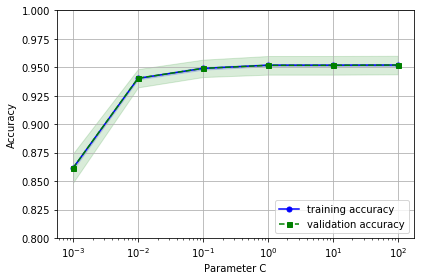

In [43]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()

plt.show()

Parameter above 0.1 all work well here and there isn't much difference if we increase C after 0.1

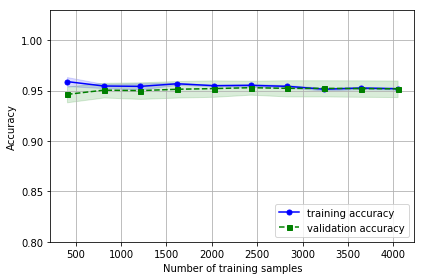

In [44]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

plt.show()

Above 3000 training samples seems to have good balance between training accuracy and validation accuracy. Our training sample is about 5000.

# k-fold crossvalidation

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.96230599 0.9556541  0.95333333 0.96222222 0.94888889 0.93318486
 0.94654788 0.94877506 0.95768374 0.94877506]
CV accuracy: 0.952 +/- 0.008


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.954


In [47]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(penalty='l2', 
                          C=0.01,
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=3,
                            p=2,
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.95 (+/- 0.01) [Logistic regression]
ROC AUC: 0.84 (+/- 0.01) [Decision tree]
ROC AUC: 0.96 (+/- 0.01) [KNN]


# Majorty voting

ROC AUC: 0.95 (+/- 0.01) [Logistic regression]
ROC AUC: 0.84 (+/- 0.01) [Decision tree]
ROC AUC: 0.96 (+/- 0.01) [KNN]
ROC AUC: 0.96 (+/- 0.01) [Majority voting]


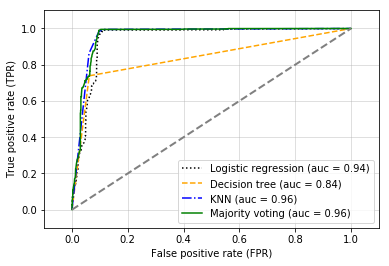

In [48]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.pipeline import _name_estimators
from sklearn.externals import six
from sklearn.base import clone
class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])

clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

#  Grid Search

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

params = {'decisiontreeclassifier__max_depth': [1, 2, 3, 4],
          'pipeline-1__clf__C': [0.001, 0.1, 100.0]}

grid = GridSearchCV(estimator=mv_clf,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_['mean_test_score'][r], 
             grid.cv_results_['std_test_score'][r] / 2.0, 
             grid.cv_results_['params'][r]))
print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.962 +/- 0.00 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}
0.962 +/- 0.00 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.1}
0.962 +/- 0.00 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 100.0}
0.964 +/- 0.00 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.001}
0.965 +/- 0.00 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.1}
0.965 +/- 0.00 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 100.0}
0.964 +/- 0.00 {'decisiontreeclassifier__max_depth': 3, 'pipeline-1__clf__C': 0.001}
0.966 +/- 0.00 {'decisiontreeclassifier__max_depth': 3, 'pipeline-1__clf__C': 0.1}
0.966 +/- 0.00 {'decisiontreeclassifier__max_depth': 3, 'pipeline-1__clf__C': 100.0}
0.965 +/- 0.00 {'decisiontreeclassifier__max_depth': 4, 'pipeline-1__clf__C': 0.001}
0.967 +/- 0.00 {'decisiontreeclassifier__max_depth': 4, 'pipeline-1__clf__C': 0.1}
0.968 +/- 0.00 {'decisiontreeclassifier__max_depth': 4, 'pipeline-1__clf_

The best parameters here are in consistent with what we used before in regression part.

# Bagging and Adaboosting

In [50]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset of Renren Dai.csv',sep=',',header=0)
df=df.dropna(subset=['status'])
Xb1 = df.iloc[:, [1,2,3]]
yb1 = df.iloc[:, 5]

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test =\
            train_test_split(Xb1, yb1, 
                             test_size=0.2, 
                             random_state=1,
                             stratify=yb1)
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 0.968/0.951
Bagging train/test accuracies 0.968/0.955


In [51]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4,
                              random_state=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.956/0.952
AdaBoost train/test accuracies 0.968/0.953


Both adaboosting and bagging increase the accuracy of prediction

# Sentiment analysis

In this part, we will conduct some research on the description of the borrower using method similar to sentiment analysis and text mining. We will try to find out whether some key words will increase or decrease the success probability of P2P contract

In [52]:
import pandas as pd
import numpy as np
df = pd.read_csv('sentiment analysis.csv',sep=',',header=0)

Detailed information about this csv used for sentiment analysis can be found in data description
It include three parts: Core explaining variables same with previous part, sentiment variable got from description of application, explained variable denoting the status of P2P.

In [53]:
df=df.dropna(subset=['status'])

In [54]:
X = df.iloc[:, [6,7]]
y = df.iloc[:, 4]

In [55]:
from sklearn.model_selection import train_test_split
Xs1_train, Xs1_test, ys1_train, ys1_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y.astype(np.int32)))
print('Labels counts in y_train:', np.bincount(y_train.astype(np.int32)))
print('Labels counts in y_test:', np.bincount(y_test.astype(np.int32)))

Labels counts in y: [2659 4841]
Labels counts in y_train: [2127 3869]
Labels counts in y_test: [532 967]


We use lr as an example model of sentiment analysis here.

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(Xs1_train, ys1_train)

from sklearn.metrics import accuracy_score
ys1_pred = lr.predict(Xs1_test)

print('Misclassified samples: %d' % (ys1_test != ys1_pred).sum())
print('Accuracy: %.2f' % accuracy_score(ys1_test, ys1_pred))

Misclassified samples: 450
Accuracy: 0.80


The accuracy is lower than what our core explaining variable can do, but they do have some explaining power. 
In the following part we try to find out the relationship between sentiment variables, core explaining variables and explained variables.

In [57]:
df.corr()

,code,interest,target,maturity,status,quick,stable
code,1.000000,-0.054290,-0.014152,0.120756,-0.147391,-0.044800,0.116814
interest,-0.054290,1.000000,0.045274,0.048882,0.353765,0.073230,-0.149796
target,-0.014152,0.045274,1.000000,0.156912,0.027188,-0.024443,-0.060620
maturity,0.120756,0.048882,0.156912,1.000000,-0.553792,-0.126320,0.466110
status,-0.147391,0.353765,0.027188,-0.553792,1.000000,0.185878,-0.583504
quick,-0.044800,0.073230,-0.024443,-0.126320,0.185878,1.000000,-0.146434
stable,0.116814,-0.149796,-0.060620,0.466110,-0.583504,-0.146434,1.000000


We can find out that "quick" is positively correlated with interest and negatively correlated with maturity, and interest is positively correlated with status and maturity is negatively correlated with status.
Similarly, "stable" is negatively correlated with interest and positively correlated with maturity, whose influence through interest and maturity are opposite to "quick".
This is in consistent with people's intution that people with urgent need will accpet higher interest rate and it will attract more investors, however, though "stable" people give a lower interest rate, it seems they don't earn good reputation and trust only be words in description.
To confirm our hypothesis, we add core variables to the model and see the difference between only core explaining variables and both core variables and sentiment variables.

In [58]:
df = pd.read_csv('sentiment analysis.csv',sep=',',header=0)
df=df.dropna(subset=['status'])
Xs2 = df.iloc[:, [1,2,3,6,7]]
ys2 = df.iloc[:, 4]


In [59]:
Xs2_train, Xs2_test, ys2_train, ys2_test = train_test_split(
    Xs2, ys2, test_size=0.3, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y.astype(np.int32)))
print('Labels counts in y_train:', np.bincount(y_train.astype(np.int32)))
print('Labels counts in y_test:', np.bincount(y_test.astype(np.int32)))

Labels counts in y: [2659 4841]
Labels counts in y_train: [2127 3869]
Labels counts in y_test: [532 967]


In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(Xs2_train)
Xs2_train_std = sc.transform(Xs2_train)
Xs2_test_std = sc.transform(Xs2_test)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100, random_state=1)
lr.fit(Xs2_train_std, ys2_train)

ys2_pred = lr.predict(Xs2_test_std)

print('Misclassified samples: %d' % (ys2_test != ys2_pred).sum())
print('Accuracy: %.2f' % accuracy_score(ys2_test, ys2_pred))

Misclassified samples: 155
Accuracy: 0.93


In [61]:
Xs3 = df.iloc[:, [1,2,3]]
ys3 = df.iloc[:, 4]
Xs3_train, Xs3_test, ys3_train, ys3_test = train_test_split(
    Xs3, ys3, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(Xs3_train)
Xs3_train_std = sc.transform(Xs3_train)
Xs3_test_std = sc.transform(Xs3_test)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100, random_state=1)
lr.fit(Xs3_train_std, ys3_train)

ys3_pred = lr.predict(Xs3_test_std)

print('Misclassified samples: %d' % (ys3_test != ys3_pred).sum())
print('Accuracy: %.2f' % accuracy_score(ys3_test, ys3_pred))

Misclassified samples: 97
Accuracy: 0.96


Same with our analysis before, adding these variables to our original model based on core variables don't help us better predict our model.
The explaining power of sentiment variable before may mainly due to the channel of core variables.